# Speedguide i R sims
/Emil

https://towardsdatascience.com/statistical-simulation-in-r-part-1-d9cb4dc393c9

### Notebook hotkeys
https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330

In [132]:
library(dplyr)
library(ggplot2)

set.seed sørger for at vi generere "de samme tilfældige værdier" når vi køre koden igen. Til projektet skal vi ikke bruge seeds.

runif(x, min=a, max=b) generates x number of values within the range between a and b.

%>% skal læses som "then" eller "then do"


In [133]:
set.seed(2)
runif(30,min=0,max=15) %>% 
  round(.,digits = 0)

[1]  3 11  9  3 14 14  2 13  7  8  8  4 11  3  6 13 15  3  7  1 10  6 13  2  5
[26]  7  2  5 14  2

### Generere numre med sample
sample(x, size, replace=TRUE, prob=NULL)

x: a vector, or a positive integer

size: a non-negative integer giving the number of items to choose

replace: sample with replacement, or not? (deffault is FALSE)

prob: a vector of probability weights for obtaining the elements of the vector being sampled

documentation: https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sample

Normalt generer sample bare numre fra det interval man giver det. Ved at bruge replace=TRUE kan man trække de samme numre igen, dvs. at alle numre har samme sandsynlighed for at være et udfald, og kan derfor optræde flere gange i rækken.

In [134]:
#denne sample kan ikke have gengangere
sample(seq(1,10),8)

[1]  6  9 10  5  8  3  1  7

In [135]:
x = 1:10
sample(x,replace=TRUE)

[1] 8 6 2 7 2 3 4 3 1 7



# Equal and Unequal Probabilities of Selection

## Lige sandsynlighed for alle udfald:

Vi laver et interval fra 1:10, med lige stor sandsynlighed for at alle værdier bliver trukket.
Vi sætter sandsynligheden ved: prob=rep(0.1,10), for værdierne 1:10, og replace=T for at kunne trække den samme værdi flere gange.

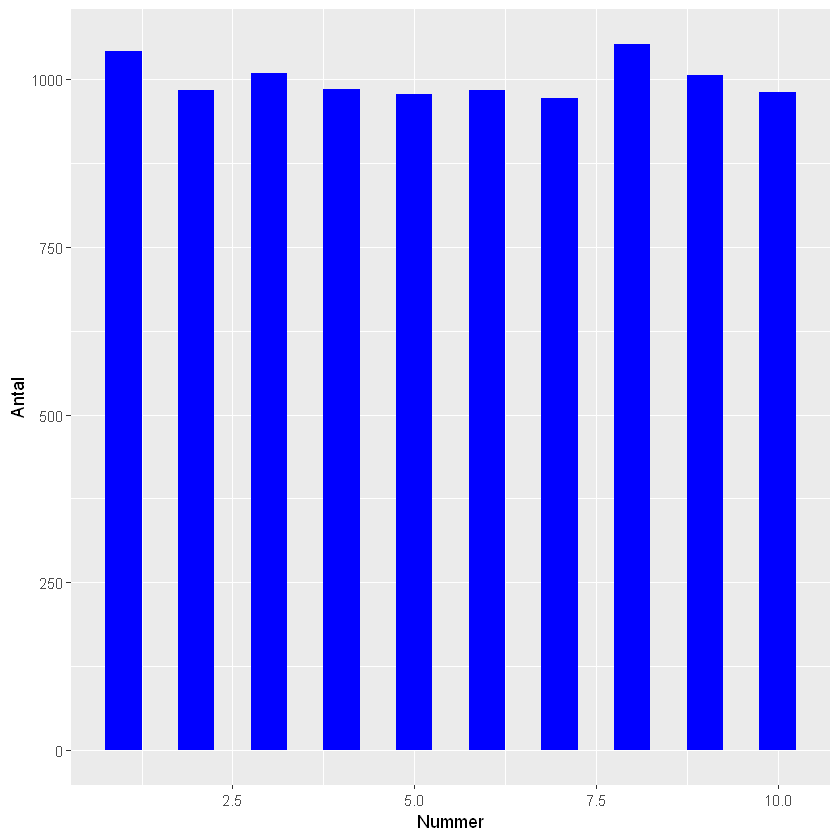

In [136]:
equal_prob = sample(10, 10000, prob=rep(0.1,10), replace=T)
qplot(equal_prob, 
      geom="histogram", 
      binwidth=0.5, 
      fill=I("blue"),
      ylab="Antal",
      xlab="Nummer"
      )

## Ulige sandsynlighed for alle udfald:

Vi laver en sample størrelse på 10000, og ændre på sandsynlighederne på udfaldet ved: prob =c(0.1,0.25,0.4,0.25,0.1)

Denne gang med intervallet 1:5

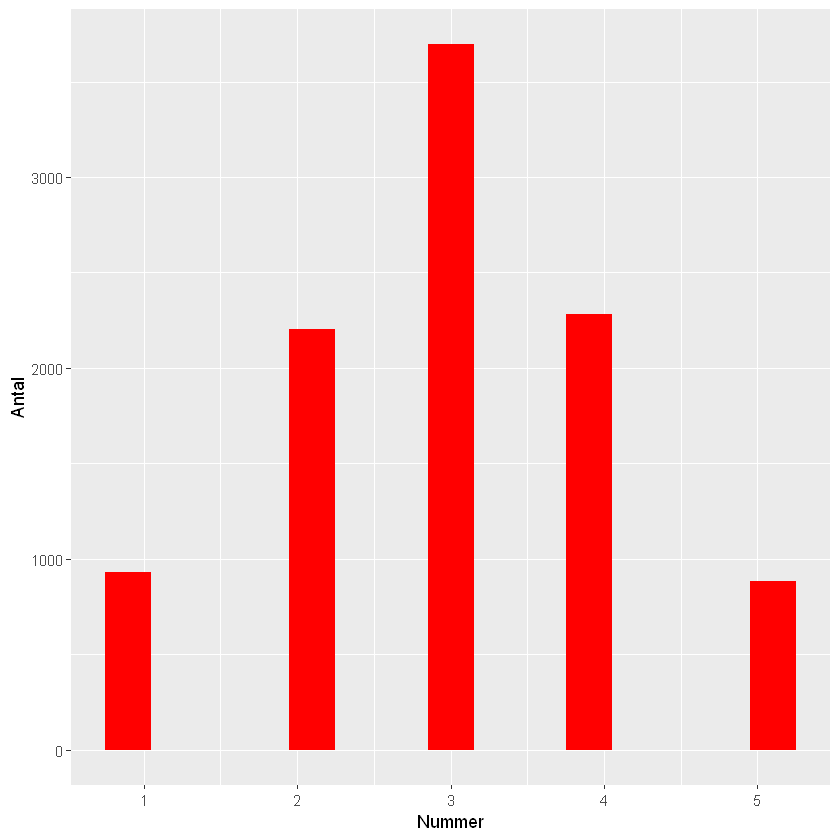

In [137]:
unequal_prob = sample(5,10000,prob =c(0.1,0.25,0.4,0.25,0.1), replace=T)
qplot(unequal_prob, 
      geom="histogram", 
      binwidth=0.3, 
      fill=I("red"),
      ylab="Antal",
      xlab="Nummer"
      )

# Sample Observations From A Data Frame

In [138]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [139]:
# step 1: create an index vector for the elements/rows 
index <- seq_len(nrow(mtcars))
 
# step 2: sample the index vector
set.seed(12)
#to obtain a set random sample of 10
sample_index <- sample(index,10)
# step 3: to show the sampled elements/rows 
mtcars[sample_index,]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


# Opgaver

#### Question 1: 

There are three 6-sided dices. If you roll them together, what is the probability of rolling a 7?

In [8]:
die = 1:6
# sample 100000 times with replacements for dice 1
die1 = sample(die, 100000, replace=TRUE)

# sample 10000 times with replacements for dice 2
die2= sample(die, 100000, replace=TRUE)

# sample 10000 times with replacements for dice 3
die3= sample(die, 100000, replace=TRUE)

# the combined value of die_1 and die_2 
outcome = die1+die2+die3

# the probability of getting a 7
mean(outcome == 7)

[1] 0.07117

#### Question 2: 

You have two dice. What is the probability of rolling a 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, and 13?

According to R documentation, sapply() function is a “user-friendly version and wrapper of lapply by default returning a vector, matrix or, if simplify = "array", an array if appropriate, by applying simplify2array(). sapply(x, f, simplify = FALSE, USE.NAMES = FALSE) is the same as lapply(x, f).”

In [7]:
sapply(2:13,function(x) mean(outcomes==x))

[1] 0.02791 0.05517 0.08356 0.11230 0.13832 0.16557 0.13980 0.11285 0.08305
[10] 0.05481 0.02666 0.00000

Vi bruger altså sapply som sapply(x, f), hvor x er intervallet og funktionen f er mean(outcomes == x)

Question 3: Generate a random sample of 10000 values, and how many unique observations are included? How many are not included?

Vi bruger unique() til at finde forskellige observationer, og length() til at tælle dem.

In [14]:
n=10000
observasions = length(unique(sample(1:n, replace=TRUE)))
observasions
missing_obs = n-observasions
missing_obs

[1] 6298

[1] 3702

#### Question 5: 

Flip a coin 10 times and simulate the process for 10,000 times. Show the distribution of the number of heads shown up.

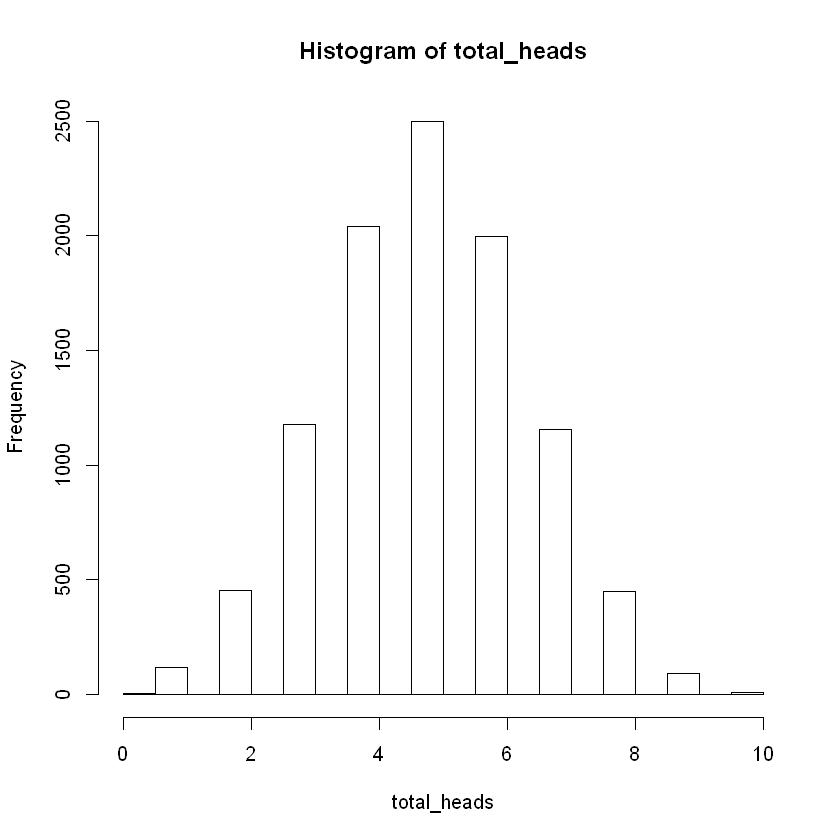

In [15]:
# create an empty list 
total_heads = c()

# use a for loop to simulate coin-flipping 10 times 
# repeat it for 10,000 times
for (i in 1:10000){
 sum_heads = sum(round(runif(10,0,1)))
 total_heads = c(total_heads, sum_heads)
 }
hist(total_heads)

I R skal vi give et interval i "for i in". Dvs: for(i in 1:1000). 

##### sum(round(runif(10,0,1))) brydes ned i tre funktioner:

##### runif() 
runif() bruges som: runif(n, min = 0, max = 1), og giver tilfældige værdier i invtervallet 0:1, dokumentation https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Uniform.html

##### round()
runder tallene op eller ned

##### sum()
summere antal gange "heads" får et udfald i samplen


total_heads = c(total_heads, sum_heads). Since total_heads is an empty list in the beginning, we use the line of code to assign the value of sum_heads to total_heads.